# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4  scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$, etc.

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n) # 4 dimensional 
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

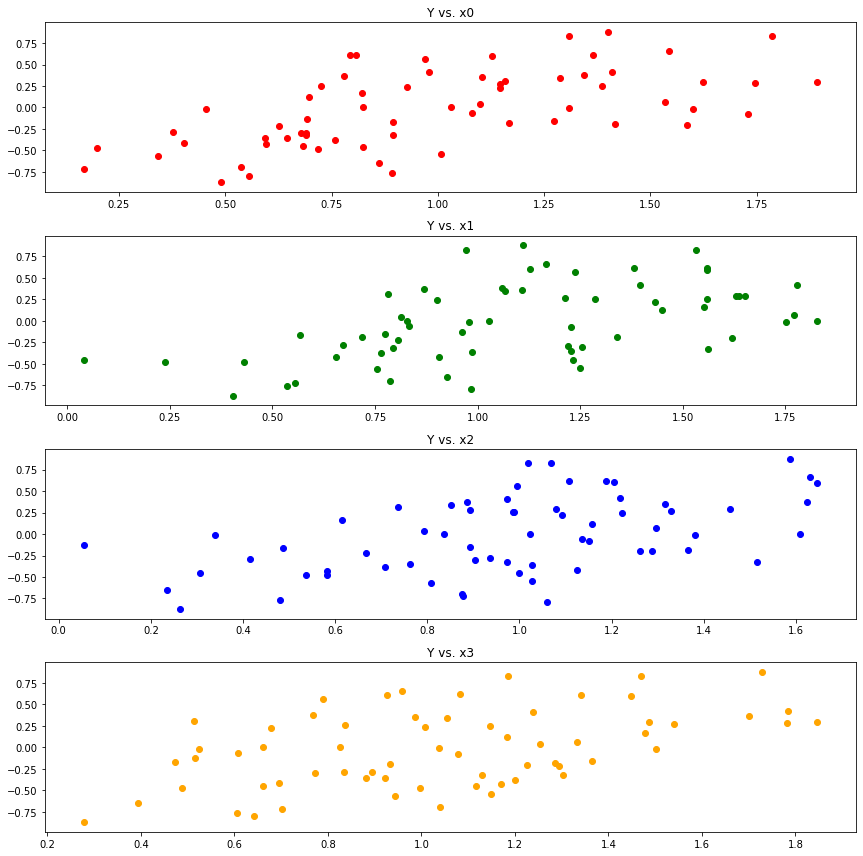

In [4]:
cols = ['red', 'green', 'blue', 'orange']

fig, axes = plt.subplots(len(x.T) - 1, 1, figsize = (12, 12))
for i in range(len(x.T) - 1):
    axes[i].set_title('Y vs. x' + str(i))
    axes[i].scatter(x = x.T[i], y = y, c = cols[i])
    
fig.tight_layout()

## 2.  Create a Linear Regression model to fit the data. Use the example from Lesson 3 and do not use a library that calculates automatically. We are expecting 5 coefficients to describe the linear model.

In [24]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)



In [25]:
np.dot(left, right)

array([-0.02272989,  0.06801294,  6.69847588,  0.23008129])

In [26]:
beta = np.linalg.lstsq(x, y)[0] #lstsq is the least sq solver
beta

C:\Users\samvt\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([-0.02272989,  0.06801294,  6.69847588,  0.23008129])

In [27]:
pred = np.dot(x, beta)

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

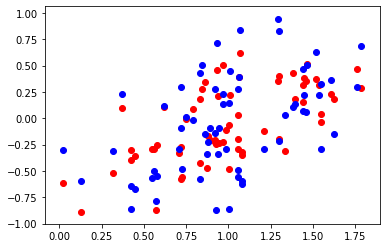

In [5]:
plt.scatter(x.T[0], pred, c = 'red')
plt.scatter(x.T[0], y, c = 'blue')

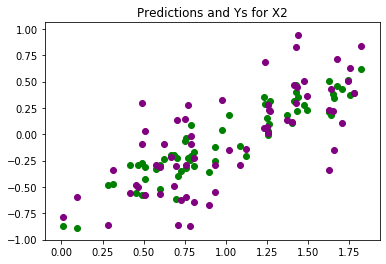

In [6]:
plt.title('Predictions and Ys for X2')
plt.scatter(x.T[1], pred, c = 'green')
plt.scatter(x.T[1], y, c = 'purple')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [7]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [8]:
columns = ['Income', 'Limit', 'Cards', 'Age']
x = credit[columns].values

In [9]:
y = credit['Rating']

In [10]:
left = np.linalg.inv(np.dot(x.T,x))

In [11]:
right = np.dot(y.T,x)

In [12]:
beta = np.dot(left, right)
beta

array([-0.02272989,  0.06801294,  6.69847588,  0.23008129])

In [15]:
pred = np.dot(x,beta)

### 5. Plot your results. Show as many of your columns vs. credit rating that you can. 

Text(0, 0.5, 'Rating')

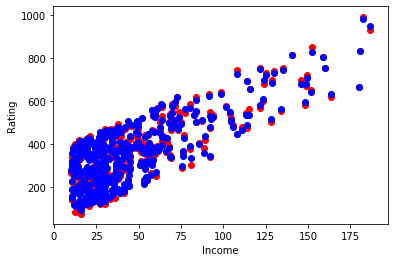

In [16]:
plt.scatter(x.T[0],pred,c='red')
plt.scatter(x.T[0],y, c='blue')
plt.xlabel('Income')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

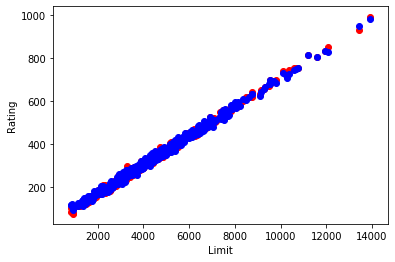

In [17]:
plt.scatter(x.T[1],pred,c='red')
plt.scatter(x.T[1],y, c='blue')
plt.xlabel('Limit')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

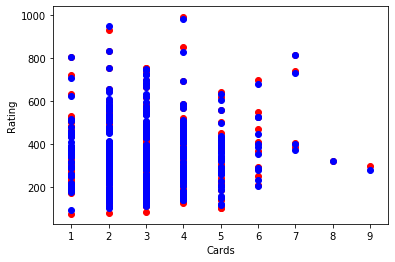

In [18]:
plt.scatter(x.T[2],pred,c='red')
plt.scatter(x.T[2],y, c='blue')
plt.xlabel('Cards')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

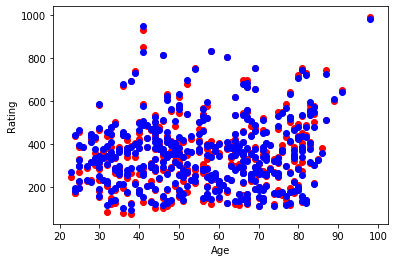

In [19]:
plt.scatter(x.T[3],pred,c='red')
plt.scatter(x.T[3],y, c='blue')
plt.xlabel('Age')
plt.ylabel('Rating')

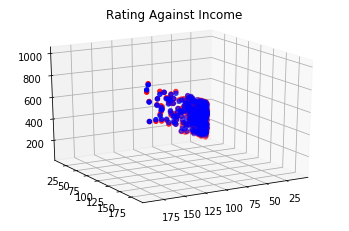

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Rating Against Income')
ax.view_init(20, 60)
ax.scatter(x.T[0], x.T[0], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[0], y, zdir='z', c='b')

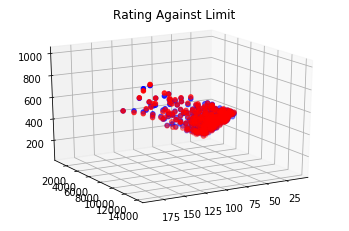

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Rating Against Limit')
ax.view_init(20, 60)
ax.scatter(x.T[0], x.T[1], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[1], y, zdir='z', c='b')

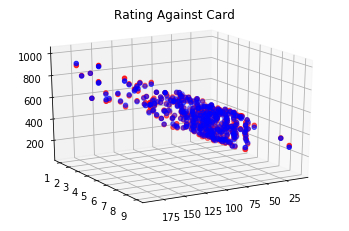

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Rating Against Card')
ax.view_init(20, 60)
ax.scatter(x.T[0], x.T[2], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[2], y, zdir='z', c='b')

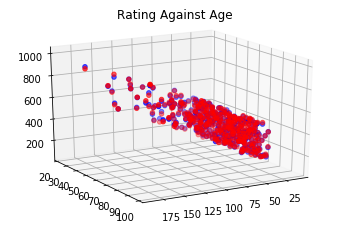

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Rating Against Age')
ax.view_init(20, 60)
ax.scatter(x.T[0], x.T[3], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[3], y, zdir='z', c='b')